In [4]:

from pysofaconventions import *
import numpy as np
def printLine():
    print("-----------------------------------------------------------------------\n")

def printBlankLine():
    print("")


In [5]:
from matplotlib import pyplot as plt
import numpy as np
path = 'sofa_hrtfs/RIEC_hrir_subject_001.sofa'
sofa = SOFAFile(path, 'r')

sourcePositions = sofa.getVariableValue('SourcePosition')
# print("\n")
# print("Source Positions")
# print(sourcePositions)
# and the info (units, coordinates)
# print(sofa.getPositionVariableInfo('SourcePosition'))

# Let's inspect the first measurement
# m = 0
# print("\n")
# print("Source Position of measurement " + str(m))
# print(sourcePositions[m])
# which is at 82 degrees azimuth, -7 degrees elevation

# Read the data
data = sofa.getDataIR()
# and get the HRTF associated with m=0

# angle, elevation, distance
# hrtf = data[m,:,:]
data.shape


(865, 2, 512)

In [6]:
sourcePositions[:, 0]

masked_array(data=[  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,
                    45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,
                    90.,  95., 100., 105., 110., 115., 120., 125., 130.,
                   135., 140., 145., 150., 155., 160., 165., 170., 175.,
                   180., 185., 190., 195., 200., 205., 210., 215., 220.,
                   225., 230., 235., 240., 245., 250., 255., 260., 265.,
                   270., 275., 280., 285., 290., 295., 300., 305., 310.,
                   315., 320., 325., 330., 335., 340., 345., 350., 355.,
                     0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,
                    45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,
                    90.,  95., 100., 105., 110., 115., 120., 125., 130.,
                   135., 140., 145., 150., 155., 160., 165., 170., 175.,
                   180., 185., 190., 195., 200., 205., 210., 215., 220.,
                   225., 230., 235., 240., 245., 25

In [7]:
# Get indexes of the source positions when the elevation is 0
i = np.where(sourcePositions[:,1] == 0)[0]
print(i)
angles=  sourcePositions[i, 0]
print(angles)

[216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270. 275.
 280. 285. 290. 295. 300. 305. 310. 315. 320. 325. 330. 335. 340. 345.
 350. 355.]


In [37]:
# Get all hrirs in data at i
hrirs = data[i,:,:]
hrirs.shape

(72, 2, 512)

In [40]:
# Get indexes where elevatio is 0 and azimuth is 0
ii = np.where(sourcePositions[:,0] == 0)[0]
# Get overlap between i and ii
iii = np.intersect1d(i, ii)
ii,iii

(array([  0,  72, 144, 216, 288, 360, 432, 504, 576, 648, 720, 792, 864],
       dtype=int64),
 array([216], dtype=int64))

In [1]:
from HRIRDataset import HRIRDataset
import matplotlib.pyplot as plt

In [2]:
sofa_file = 'sofa_hrtfs/RIEC_hrir_subject_001.sofa'
hrir_dataset = HRIRDataset()
hrir_dataset.load(sofa_file)

In [3]:
hrir_dataset[32]

(masked_array(
   data=[[ 0.00459809,  0.00163729,  0.00456762, ...,  0.00237496,
           0.00237496,  0.00237496],
         [ 0.00026689,  0.00076232, -0.00011474, ...,  0.00077833,
           0.00077833,  0.00077833]],
   mask=False,
   fill_value=1e+20),
 masked_array(
   data=[[4.86887069e-04, 8.78747766e-04, 3.36181724e-04, ...,
          7.09368777e-05, 7.09368777e-05, 7.09368777e-05],
         [8.12046104e-04, 8.12046104e-04, 8.12046104e-04, ...,
          8.12046104e-04, 8.12046104e-04, 8.12046104e-04]],
   mask=False,
   fill_value=1e+20),
 160.0)

In [ ]:
import torch
from torch import nn

class PredictiveModel(nn.Module):
    def __init__(self, d_model=3, nhead=3, num_layers=8):
        super(PredictiveModel, self).__init__()
        self.transformer = nn.Transformer(d_model, nhead, num_layers)
        # self.linear = nn.Linear(d_model, d_model)

    def random_mask(self, input, mask_ratio=0.1):
        # Create a random binary mask with approximately `mask_ratio` fraction of zeros
        mask = (torch.rand(input.shape) > mask_ratio).float()
        # Apply the mask to the input (elementwise multiplication)
        masked_input = input * mask
        return masked_input

    def forward(self, src, tgt, angle, mask_ratio=0.1, src_mask=None, tgt_mask=None):
        # src: [batch_size, d_model, seq_length]
        # tgt: [batch_size, d_model, seq_length]
        # angle: [batch_size, 1]
        #print(src.shape, tgt.shape, angle.shape)
        src = self.random_mask(src, mask_ratio)
        #angle = torch.tensor(float(angle)).view(1, 1, 1).expand(src.shape[0], src.shape[1], 1)
        # Reshape it to have shape (batch_size, 1, 1)
        angle = angle.view(src.shape[0], 1, 1)

        # Expand it to have the same sequence length as src
        angle = angle.expand(-1, -1, src.shape[2])
        #print(src.shape, tgt.shape, angle.shape)
        # Concatenate angle with src along the feature dimension
        src = torch.cat((src, angle), dim=1)
        
        # Keep src and tgt the same shape
        constant_tgt = torch.full_like(angle, -1)
        tgt = torch.cat((tgt, constant_tgt), dim=1)
        # Change the shape to [seq_length, batch_size, d_model]
        src = src.permute(2, 0, 1)
        tgt = tgt.permute(2, 0, 1)
        output = self.transformer(src, tgt, src_mask=src_mask, tgt_mask=tgt_mask)
        # Convert back to [batch_size, d_model, seq_length]
        output = output.permute(1, 2, 0)
        # print(output.shape)
        # output = self.linear(output)
        return output

In [177]:
import torch
from torch import nn

class MaskedModel(nn.Module):
    def __init__(self, d_model=3, nhead=3, num_layers=8):
        super(MaskedModel, self).__init__()
        self.transformer = nn.Transformer(d_model, nhead, num_layers)
        # self.linear = nn.Linear(d_model, d_model)

    def random_mask(self, input, mask_ratio=0.1):
        # Create a random binary mask with approximately `mask_ratio` fraction of zeros
        mask = (torch.rand(input.shape) > mask_ratio).float()
        # Apply the mask to the input (elementwise multiplication)
        masked_input = input * mask
        return masked_input
    
    def autoregressive_inference(self, input, angle):
        # Initialize the output sequence with a start-of-sequence token
        output = torch.zeros_like(input)
        output[:, 0] = input[:, 0]

        # Loop over each position in the output sequence
        for t in range(1, output.size(1)):
            # Get the predictions for the next token
            predictions = self.transformer(input, output, angle)
            
            # Choose the token with the highest prediction as the next token
            # This is a simple "greedy" decoding method; other methods like beam search could also be used
            output[:, t] = predictions[:, t-1].argmax(dim=-1)
        
        return output
    
    def forward(self, src, tgt, angle, src_mask=None, tgt_mask=None):
        if self.training and tgt is not None:
            # create a 512 long angle tensor to add as a feature
            angle = angle.view(src.shape[0], 1, 1)
            angle = angle.expand(-1, -1, src.shape[2])
            src = torch.cat((src, angle), dim=1)
            # Do the same for tgt but set it to -1 since that isn't a real angle
            constant_tgt = torch.full_like(angle, -1)
            tgt = torch.cat((tgt, constant_tgt), dim=1)
            
            # Replace the first value of tgt with the first value of src
            # Since when we generate, we won't have a value for tgt
            tgt = torch.cat([src[:, :1], tgt[:, 1:]], dim=1)
            #print(tgt.shape)
            src = src.permute(2, 0, 1)
            tgt = tgt.permute(2, 0, 1)
            
            output = self.transformer(src, tgt, src_mask=src_mask, tgt_mask=tgt_mask)
            # Convert back to [batch_size, d_model, seq_length]
            output = output.permute(1, 2, 0)
            # print(output.shape)
            # output = self.linear(output)
        else:
            # No value for tgt so we generate one
            output = self.autoregressive_inference(src, angle)
        return output

In [178]:
# Create a model object
model = MaskedModel(d_model=3)

# Create dummy input data
batch_size = 5
seq_length = 512
d_model = 2
src = torch.randn(batch_size, d_model, seq_length)
tgt = torch.randn(batch_size, d_model, seq_length)
prompt = [90.,90.,90.,90.,90.]
angle = torch.tensor(prompt)


In [179]:
src.shape, tgt.shape, angle

(torch.Size([5, 2, 512]),
 torch.Size([5, 2, 512]),
 tensor([90., 90., 90., 90., 90.]))

In [180]:
# Pass the dummy input through the model
output = model(src, tgt, angle)

# Print the output shape
print(output.shape)

torch.Size([5, 3, 512])


In [181]:
from torch.utils.data import DataLoader

# Set the model to training mode
model.train()
num_epochs = 100

# Create the DataLoader
dataloader = DataLoader(hrir_dataset, batch_size=2, shuffle=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


In [183]:
import torch
from torch import optim, nn

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters())
loss_function = nn.MSELoss()

# Set the model to training mode
model.train()

# Loop over each epoch
for epoch in range(num_epochs):
    # Initialize the epoch loss
    epoch_loss = 0.0

    # Loop over each batch
    for i, batch in enumerate(dataloader):
        # Get the src and tgt sequences from the batch
        #print(batch)
        src, tgt, angle = batch

        # Move data to the same device as the model
        src = src.to(device)
        tgt = tgt.to(device)
        angle = angle.to(device)
        # convert to floats
        angle = angle.float()
        src = src.float()
        tgt = tgt.float()

        # Zero the gradients
        optimizer.zero_grad()

        src = (src - src.mean()) / src.std()
        tgt = (tgt - tgt.mean()) / tgt.std()

        # Forward pass through the model
        output = model(src, tgt, angle)
        
        # remove the last feature dimension from output
        # [batch_size, d_model, seq_length] --> [batch_size, d_model-1, seq_length]
        output = output[:, :-1, :]
        #print(output.shape, tgt.shape)
        # Compute the loss
        loss = loss_function(output, tgt)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        # Accumulate the batch loss
        epoch_loss += loss.item()

    # Print the average loss for this epoch
    print(f'Epoch {epoch+1}, Loss: {epoch_loss / len(dataloader)}')

Epoch 1, Loss: 1.5032082663642035
Epoch 2, Loss: 1.3924590713447995
Epoch 3, Loss: 1.3235995206567976
Epoch 4, Loss: 1.2656113968955145
Epoch 5, Loss: 1.2161039511362712
Epoch 6, Loss: 1.173199690050549
Epoch 7, Loss: 1.1382098197937012
Epoch 8, Loss: 1.109126349290212
Epoch 9, Loss: 1.0847125152746837
Epoch 10, Loss: 1.0650041004021962
Epoch 11, Loss: 1.0496020515759785
Epoch 12, Loss: 1.0369381739033594
Epoch 13, Loss: 1.0274304747581482
Epoch 14, Loss: 1.0199998087353177
Epoch 15, Loss: 1.0149031513267093
Epoch 16, Loss: 1.010425329208374
Epoch 17, Loss: 1.007014787859387
Epoch 18, Loss: 1.0049467318587832
Epoch 19, Loss: 1.0028550955984328
Epoch 20, Loss: 1.0021459294690027
Epoch 21, Loss: 1.0018825100527868
Epoch 22, Loss: 1.001203778717253
Epoch 23, Loss: 1.000438070959515
Epoch 24, Loss: 1.0003438807196088
Epoch 25, Loss: 1.0003725820117526
Epoch 26, Loss: 1.0004195306036208
Epoch 27, Loss: 1.000026500887341
Epoch 28, Loss: 1.0000442134009466
Epoch 29, Loss: 0.9998999767833285
E

tensor([[[ 1.1777e-03, -1.5491e-03,  1.2986e-03,  ...,  4.7236e-05,
           4.7236e-05,  4.7236e-05],
         [ 4.3299e-04,  4.3299e-04,  4.3299e-04,  ...,  4.3299e-04,
           4.3299e-04,  4.3299e-04]]], dtype=torch.float64)

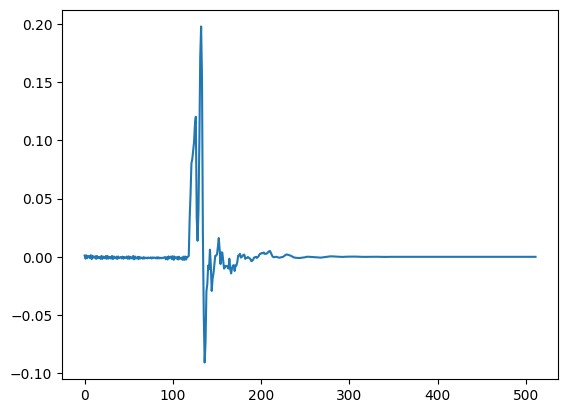

In [152]:
# Get src, tgt, and angle from the first batch
src, tgt, angle = next(iter(dataloader))
# Get first elements
src = src[0:1]
tgt = tgt[0:1]
angle = angle[0:1]

# plot the target
plt.plot(tgt[0,0,:].detach().cpu().numpy())
tgt

array([ 3.77852912e-02, -4.01654204e-03,  3.73551157e-02,  7.73091339e-03,
        1.74173118e-02,  6.66666434e-03,  1.39616821e-02,  8.24650423e-03,
       -5.27145501e-03,  1.63275259e-02, -1.85339146e-03,  2.52421640e-02,
       -8.54528179e-03,  2.06540320e-02,  5.00195532e-03,  1.08487203e-02,
       -7.13157763e-03,  2.14062396e-02, -7.41060428e-03,  2.69516515e-02,
       -1.17385645e-02,  1.93749805e-02,  1.47198434e-02, -2.68106262e-02,
        4.51641858e-02, -5.10899634e-02,  6.65770926e-02, -3.87182313e-02,
        4.53971518e-02, -1.84946171e-02,  4.06100618e-03,  9.20662130e-03,
       -2.81948631e-02,  4.06701984e-02, -4.40110887e-02,  4.36390241e-02,
       -3.84110946e-02,  4.07299140e-02, -3.30852595e-02,  4.03505845e-02,
       -4.15764270e-02,  2.85782654e-02, -1.84035937e-02,  1.06619490e-02,
        9.87559659e-03, -3.18587620e-02,  3.88815536e-02, -5.58735762e-02,
        6.62138751e-02, -7.02538216e-02,  8.30278461e-02, -7.53922610e-02,
        6.86990437e-02, -

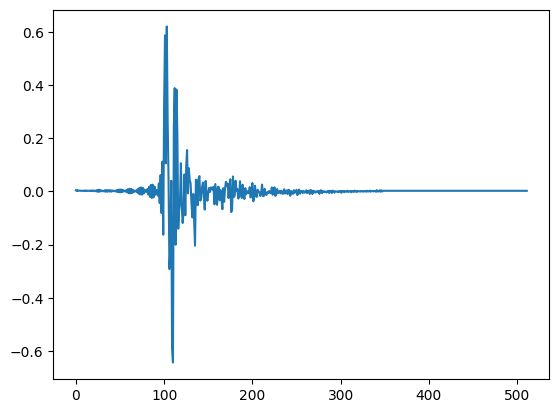

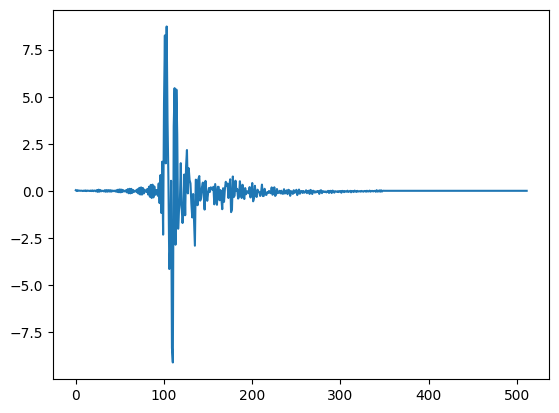

In [160]:
import numpy as np
# plot the src
a = src[0,0,:].detach().cpu().numpy()
plt.plot(a)
plt.figure()
# Assume hrir is your HRIR data
hrir_mean = np.mean(a)
hrir_std = np.std(a)

hrir_standardized = (a - hrir_mean) / hrir_std
plt.plot(hrir_standardized)
# src
hrir_standardized

In [154]:
# Pass the src, tgt, and angle through the model
model.eval()
output = model(src.to(device).float(), tgt.to(device).float(), angle.to(device).float())
output

tensor([[[1.2782e-03, 1.2782e-03, 1.2782e-03,  ..., 1.2782e-03,
          1.2781e-03, 1.2782e-03],
         [2.4054e-03, 2.4054e-03, 2.4054e-03,  ..., 2.4054e-03,
          2.4055e-03, 2.4054e-03],
         [1.4142e+00, 1.4142e+00, 1.4142e+00,  ..., 1.4142e+00,
          1.4142e+00, 1.4142e+00]]], grad_fn=<PermuteBackward0>)

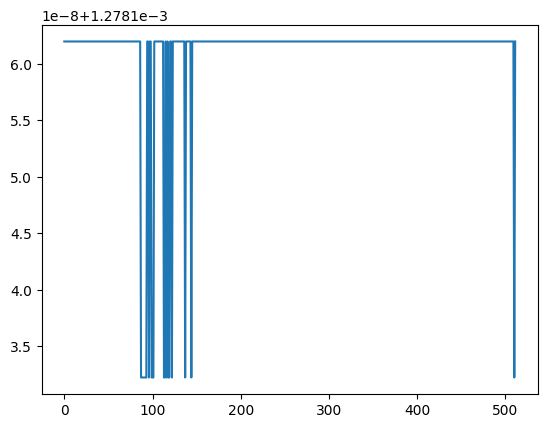

In [155]:
# Plot the output
plt.plot(output[0,0,:].detach().cpu().numpy())